In [1]:
pip install kagglehub

In [2]:
import kagglehub

path = kagglehub.dataset_download("asaniczka/1-3m-linkedin-jobs-and-skills-2024")

print("Path to dataset files:", path)

100%|██████████| 1.88G/1.88G [00:10<00:00, 190MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024/versions/2


In [3]:
import kagglehub
import pandas as pd
import os

In [4]:
files_in_directory = os.listdir(path)

csv_file = [file for file in files_in_directory if file.endswith('.csv')][2]
csv_file1 = [file for file in files_in_directory if file.endswith('.csv')][0]

df = pd.read_csv(os.path.join(path, csv_file))
df1 = pd.read_csv(os.path.join(path, csv_file1))

print("Columns in the dataset:")
print(df.columns)
print(df1.columns)

Columns in the dataset:
Index(['job_link', 'job_skills'], dtype='object')
Index(['job_link', 'last_processed_time', 'got_summary', 'got_ner',
       'is_being_worked', 'job_title', 'company', 'job_location', 'first_seen',
       'search_city', 'search_country', 'search_position', 'job_level',
       'job_type'],
      dtype='object')


In [7]:
career_dataset = pd.merge(df1, df, on='job_link', how='inner')

In [8]:
career_dataset.head(2)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,"Medical equipment sales, Key competitors, Term..."
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,"Nursing, Bachelor of Science in Nursing, Maste..."


In [9]:
career_dataset.dropna()
len(career_dataset)

1296381

In [10]:
career_dataset = career_dataset[career_dataset['search_country'] == 'United States']

In [11]:
len(career_dataset)

1105410

In [12]:
keywords = ["data", "scientist", "analyst", "engineer", "software", "project", "business", "intelligence", "developer", "frontend", "backend", "machine", "technology", "cloud", "ai",
            "database", "cyber"," automation", "analytics", "programmer", "administrator","product", "development", "security", "graphic", "designer", "seo",
            "stack", "web", "developer", "artificial intelligence", "AI/ML", "engineering", "Data Science", "management", "Finance"]

In [13]:
top_15_job_cities = career_dataset['job_location'].value_counts().head(15)

top_15_job_cities


,count
job_location,
"New York, NY",12580
"Houston, TX",10331
"Chicago, IL",10188
"Los Angeles, CA",9736
"Atlanta, GA",8739
"Boston, MA",7924
"Dallas, TX",7513
"Austin, TX",7234
"Washington, DC",6869


In [14]:
Total_jobs_count = top_15_job_cities.sum()

print("Sum of total job counts in top 15 cities:", Total_jobs_count)

Sum of total job counts in top 15 cities: 119502


In [15]:
top_15_cities_jobs = top_15_job_cities.index
career_dataset = career_dataset[career_dataset['job_location'].isin(top_15_cities_jobs)]

len(career_dataset)

119502

In [16]:
def filter_job_titles_with_keywords(career_dataset, keywords):
    # Create a mask to check if any job title contains any of the keywords as whole words
    mask = career_dataset['job_title'].str.contains(r'\b(' + '|'.join(keywords) + r')\b', case=False, na=False)

    filtered_dataset = career_dataset[mask]

    return filtered_dataset

career_dataset = filter_job_titles_with_keywords(career_dataset, keywords)

print(career_dataset)

<ipython-input-16-0013c7c80148>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = career_dataset['job_title'].str.contains(r'\b(' + '|'.join(keywords) + r')\b', case=False, na=False)


                                                  job_link  \
14       https://www.linkedin.com/jobs/view/senior-asso...   
114      https://www.linkedin.com/jobs/view/family-advo...   
169      https://www.linkedin.com/jobs/view/senior-audi...   
238      https://www.linkedin.com/jobs/view/it-business...   
336      https://www.linkedin.com/jobs/view/management-...   
...                                                    ...   
1296136  https://www.linkedin.com/jobs/view/it-project-...   
1296171  https://www.linkedin.com/jobs/view/dynamics-36...   
1296246  https://www.linkedin.com/jobs/view/manager-dig...   
1296248  https://www.linkedin.com/jobs/view/gnc-enginee...   
1296310  https://www.linkedin.com/jobs/view/public-noti...   

                   last_processed_time got_summary got_ner is_being_worked  \
14       2024-01-21 02:01:10.496553+00           t       t               f   
114      2024-01-21 07:44:05.197927+00           t       t               f   
169      2024-01-21 0

In [17]:
career_dataset.columns

Index(['job_link', 'last_processed_time', 'got_summary', 'got_ner',
       'is_being_worked', 'job_title', 'company', 'job_location', 'first_seen',
       'search_city', 'search_country', 'search_position', 'job_level',
       'job_type', 'job_skills'],
      dtype='object')

job_title
Senior Software Engineer        159
Business Analyst                151
Senior Electrical Engineer      124
Assistant Project Manager       100
Senior Financial Analyst         92
Senior Project Manager           89
Senior Mechanical Engineer       84
Project Architect                84
Business Development Manager     83
Project Manager                  78
Civil Engineer                   70
Electrical Engineer              70
Construction Project Manager     63
Project Engineer                 62
Senior Structural Engineer       56
Senior Network Engineer          47
Lead Software Engineer           45
Engineering Manager              44
Software Engineer                43
Senior Project Engineer          42
Name: count, dtype: int64


<ipython-input-18-0d56ca63eb15>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job_title', data=career_dataset, order=top_job_titles.index, palette='viridis')


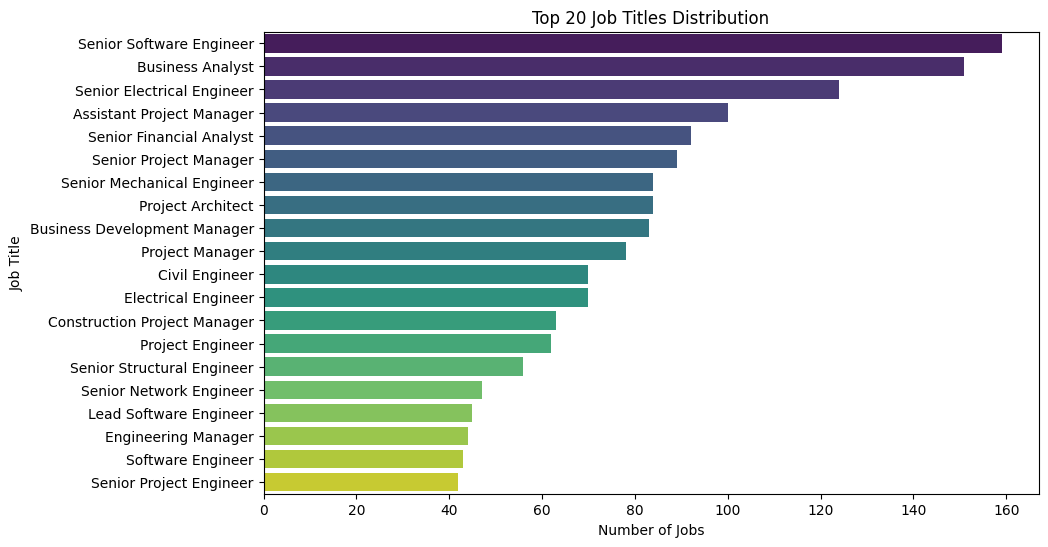

In [18]:
# Display the top 20 most common job titles
top_job_titles = career_dataset['job_title'].value_counts().head(20)
print(top_job_titles)

# Plot the distribution of job titles
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y='job_title', data=career_dataset, order=top_job_titles.index, palette='viridis')
plt.title('Top 20 Job Titles Distribution')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Title')
plt.show()

In [19]:
import pandas as pd
import numpy as np

def clean_job_skills(job_skills):
    if isinstance(job_skills, str):

        # Step 2: Split the skills into a list (based on commas)
        skills_list = job_skills.split(',')

        # Step 3: Standardize similar skills (e.g., "problem solving" vs "problemsolving")
        skills_list = [standardize_skill(skill) for skill in skills_list]

        # Step 4: Strip any leading/trailing whitespace from each skill
        skills_list = [skill.strip() for skill in skills_list]

        # Step 5: Convert to lowercase to standardize
        skills_list = [skill.lower() for skill in skills_list]

        # Step 6: Remove any duplicates
        skills_list = list(set(skills_list))

        # Return the cleaned skills as a comma-separated string
        return ', '.join(sorted(skills_list))
    else:
        # If job_skills is NaN or None, return an empty string
        return ''

def standardize_skill(skill):
    # Mapping of common variations (you can add more if needed)
    skill_mapping = {
        'problem solving': 'problem_solving',
        'problemsolving': 'problem_solving',
        'communication skills': 'communication',
        'data analytics': 'data_analysis',
        'data analysis': 'data_analysis',
        'cyber security': 'cyber_security',
        'cybersecurity': 'cyber_security',
    }

    for key, value in skill_mapping.items():
        if key in skill.lower():  # Check if keyword is part of the skill string (case insensitive)
            return value

    return skill

career_dataset['cleaned_job_skills'] = career_dataset['job_skills'].apply(clean_job_skills)

print(career_dataset[['job_title', 'cleaned_job_skills']])

                                                 job_title  \
14                 Senior Associate, Tax - Product Analyst   
114             Family Advocate - Enhanced Care Management   
169      Senior Audit Manager - Operational Risk Manage...   
238                     IT / Business Framework Specialist   
336         Management and Program Analyst 12 Month Roster   
...                                                    ...   
1296136                                 IT Project Manager   
1296171                    Dynamics 365 Functional Analyst   
1296246                Manager, Digital Product Management   
1296248                           GNC Engineer II (R37511)   
1296310  Public Notice for Physical Scientist (Direct H...   

                                        cleaned_job_skills  
14       asp.net, bachelor's degree in computer science...  
114      care management assessment, care management tr...  
169      adverse events, analytical skills, applicable ...  
238      ag

In [20]:
ignored_skills = ['problem_solving', 'communication', 'cyber_security']

def remove_ignored_skills(job_skills):
    # Convert job_skills string into a list (if not already)
    skills_list = job_skills.split(', ')

    # Filter out the ignored skills
    filtered_skills = [skill for skill in skills_list if skill not in ignored_skills]

    # Return the filtered skills as a comma-separated string
    return ', '.join(filtered_skills)

career_dataset['cleaned_job_skills'] = career_dataset['cleaned_job_skills'].apply(remove_ignored_skills)

print(career_dataset[['job_title', 'cleaned_job_skills']])


                                                 job_title  \
14                 Senior Associate, Tax - Product Analyst   
114             Family Advocate - Enhanced Care Management   
169      Senior Audit Manager - Operational Risk Manage...   
238                     IT / Business Framework Specialist   
336         Management and Program Analyst 12 Month Roster   
...                                                    ...   
1296136                                 IT Project Manager   
1296171                    Dynamics 365 Functional Analyst   
1296246                Manager, Digital Product Management   
1296248                           GNC Engineer II (R37511)   
1296310  Public Notice for Physical Scientist (Direct H...   

                                        cleaned_job_skills  
14       asp.net, bachelor's degree in computer science...  
114      care management assessment, care management tr...  
169      adverse events, analytical skills, applicable ...  
238      ag

In [21]:
len(career_dataset)

30352

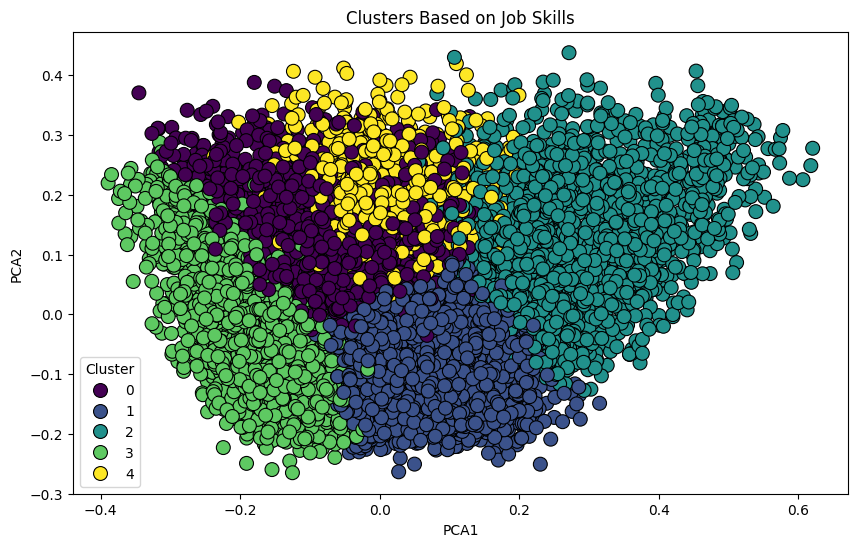

                                             job_title  \
14             Senior Associate, Tax - Product Analyst   
114         Family Advocate - Enhanced Care Management   
169  Senior Audit Manager - Operational Risk Manage...   
238                 IT / Business Framework Specialist   
336     Management and Program Analyst 12 Month Roster   
356                                        Scientist I   
396                          Talent Development Leader   
473  Senior Manager, Packaging Development Engineer...   
488                            BIM/VDC Senior Engineer   
489        SENIOR ENVIRONMENTAL SCIENTIST (SPECIALIST)   
499  Sr. Strategic Supply Chain Mgr, Amazon Busines...   
510     Identity and Access Management (IAM) Architect   
649                        Application Support Analyst   
679                    Information Security Analyst II   
707                                 Software Architect   
737                                   Senior Developer   
744           

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


career_dataset['cleaned_job_skills'] = career_dataset['cleaned_job_skills'].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else x
)

# Step 1: Vectorize the 'cleaned_job_skills' column using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(career_dataset['cleaned_job_skills'])

# Step 2: Apply K-Means clustering (choose the number of clusters)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
career_dataset['cluster'] = kmeans.fit_predict(X)

# Step 3: Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

# Add PCA components to the DataFrame
career_dataset['PCA1'] = principal_components[:, 0]
career_dataset['PCA2'] = principal_components[:, 1]

# Step 4: Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=career_dataset, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=100, edgecolor='black')
plt.title('Clusters Based on Job Skills')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

# Step 5: Display the resulting clusters
print(career_dataset[['job_title', 'cleaned_job_skills', 'cluster']].head(20))  # Show first 20 rows to see job titles and their clusters

In [23]:
from collections import Counter

# Step 1: Group by cluster and aggregate skills
clustered_skills = career_dataset.groupby('cluster')['cleaned_job_skills'].apply(lambda x: ' '.join(x)).reset_index()

# Step 2: Count frequency of each skill in each cluster
def get_most_common_skills(skills_string):
    skills_list = skills_string.split(', ')
    skill_counts = Counter(skills_list)
    return skill_counts.most_common()

# Step 3: Apply the function to each cluster
clustered_skills['common_skills'] = clustered_skills['cleaned_job_skills'].apply(get_most_common_skills)

print(clustered_skills[['cluster', 'common_skills']])

   cluster                                      common_skills
0        0  [(project management, 2854), (data_analysis, 1...
1        1  [(python, 2357), (java, 1527), (data_analysis,...
2        2  [(data_analysis, 1254), (sql, 1199), (python, ...
3        3  [(project management, 2773), (civil engineerin...
4        4  [(data_analysis, 706), (financial analysis, 67...


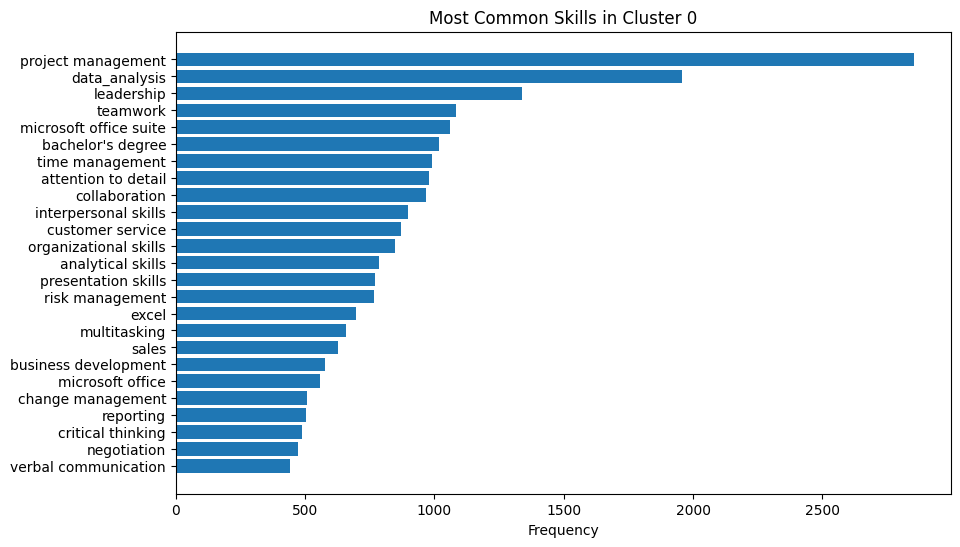

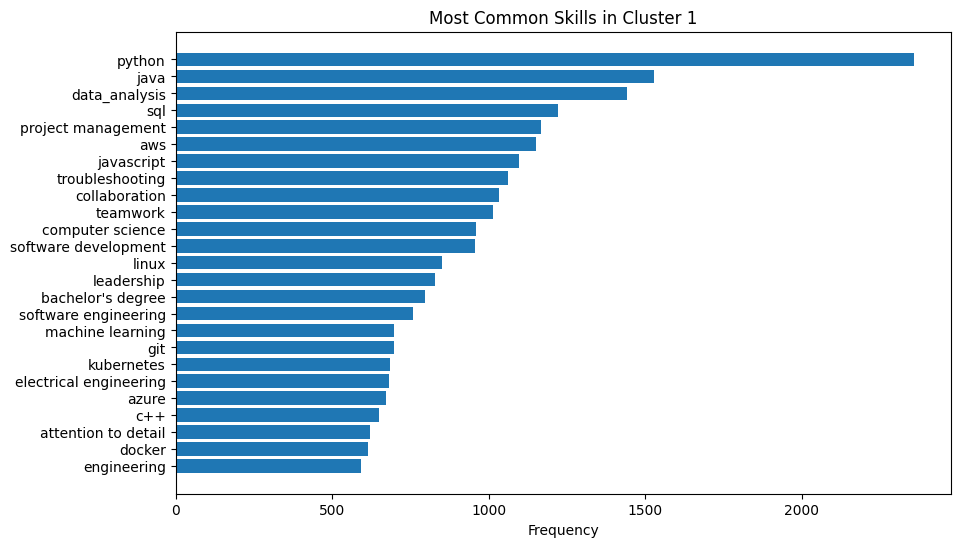

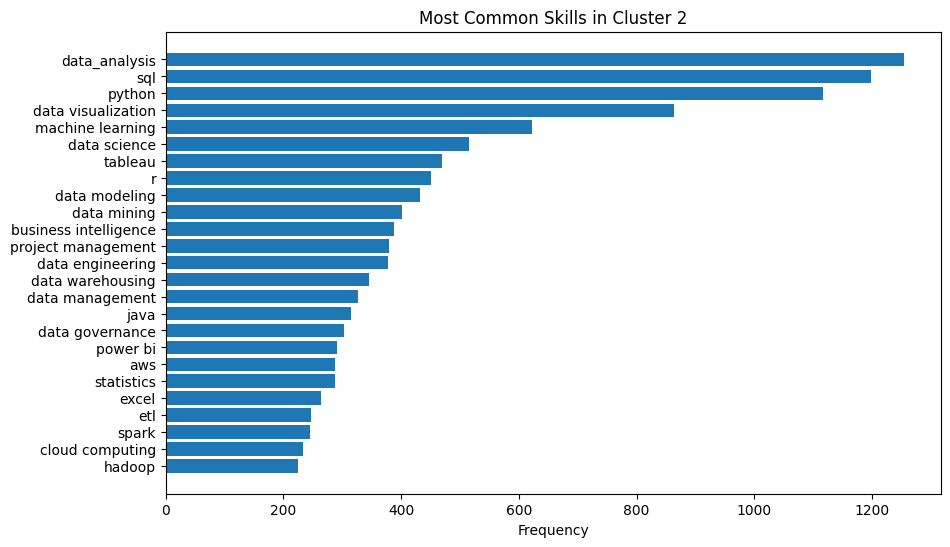

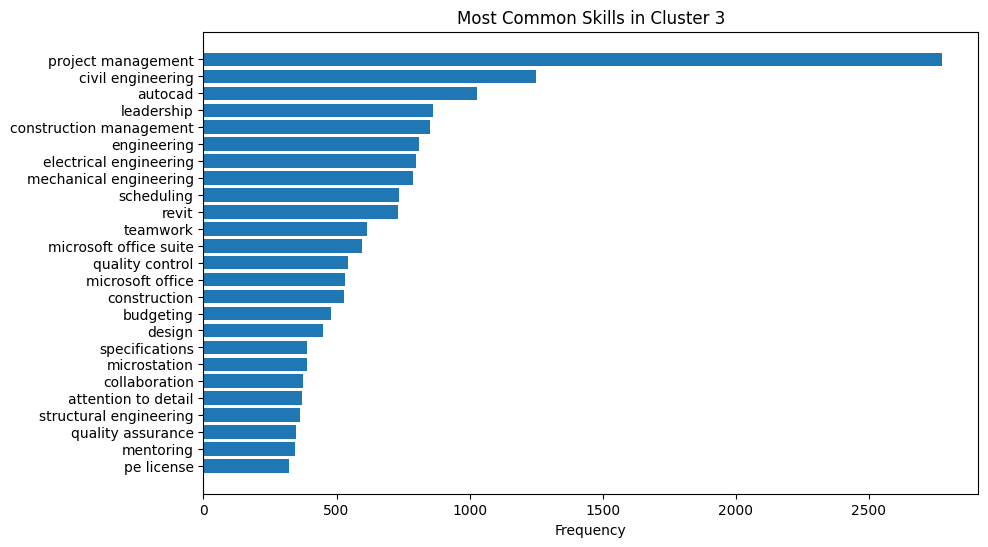

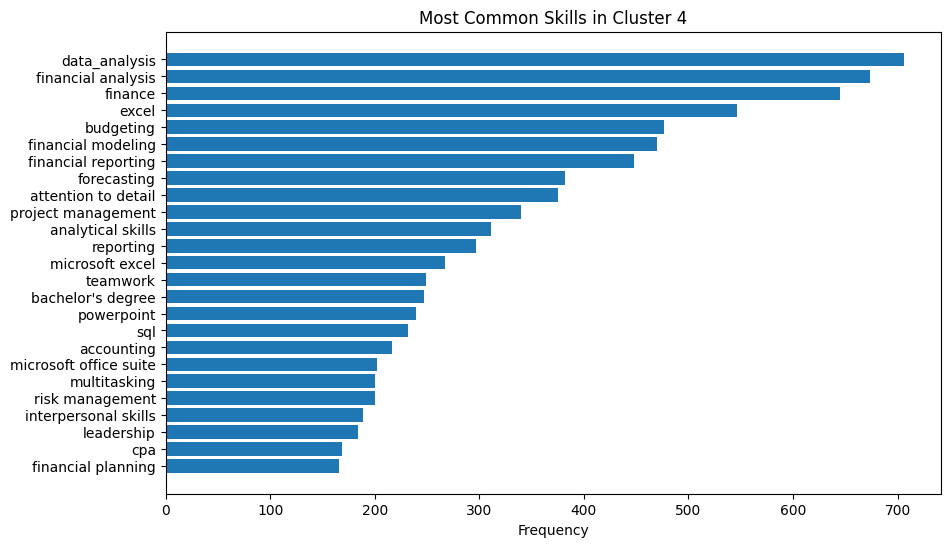

In [24]:
import matplotlib.pyplot as plt

# Plotting the Top 25 common skills for each cluster
for cluster in clustered_skills['cluster'].unique():
    skills = clustered_skills[clustered_skills['cluster'] == cluster]['common_skills'].values[0]
    skills_names = [skill[0] for skill in skills]
    skills_counts = [skill[1] for skill in skills]

    plt.figure(figsize=(10, 6))
    plt.barh(skills_names[:25], skills_counts[:25])
    plt.xlabel('Frequency')
    plt.title(f'Most Common Skills in Cluster {cluster}')
    plt.gca().invert_yaxis()
    plt.show()

In [25]:
len(career_dataset)

30352

In [27]:
# Mapping clusters to their respective labels
cluster_labels = {
    0: 'Management',
    1: 'Computer Science',
    2: 'Data Science',
    3: 'Core Engineering',
    4: 'Finance'
}

# Assign labels to the clusters in the DataFrame
career_dataset['cluster_label'] = career_dataset['cluster'].map(cluster_labels)

print(career_dataset[['job_title', 'cleaned_job_skills', 'cluster', 'cluster_label']].head())


                                             job_title  \
14             Senior Associate, Tax - Product Analyst   
114         Family Advocate - Enhanced Care Management   
169  Senior Audit Manager - Operational Risk Manage...   
238                 IT / Business Framework Specialist   
336     Management and Program Analyst 12 Month Roster   

                                    cleaned_job_skills  cluster  \
14   asp.net, bachelor's degree in computer science...        1   
114  care management assessment, care management tr...        0   
169  adverse events, analytical skills, applicable ...        0   
238  agile development, agile development and devse...        0   
336  accredited or preaccredited college or univers...        1   

        cluster_label  
14   Computer Science  
114        Management  
169        Management  
238        Management  
336  Computer Science  


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Vectorizing the 'cleaned_job_skills' column using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(career_dataset['cleaned_job_skills'])

# Encode the labels (cluster categories)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(career_dataset['cluster_label'])

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Training set size: 24281, Test set size: 6071


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

logreg_predictions = logreg.predict(X_test)
rf_predictions = rf.predict(X_test)
dt_predictions = dt.predict(X_test)

# Evaluate the models
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions, target_names=label_encoder.classes_))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=label_encoder.classes_))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions, target_names=label_encoder.classes_))


Logistic Regression Accuracy: 0.9622796903310822
Random Forest Accuracy: 0.8982045791467633
Decision Tree Accuracy: 0.836435513095042

Logistic Regression Classification Report:
                  precision    recall  f1-score   support

Computer Science       0.96      0.98      0.97      2783
Core Engineering       0.98      0.97      0.97      1030
    Data Science       0.96      0.94      0.95       445
         Finance       0.95      0.93      0.94       394
      Management       0.96      0.93      0.95      1419

        accuracy                           0.96      6071
       macro avg       0.96      0.95      0.96      6071
    weighted avg       0.96      0.96      0.96      6071


Random Forest Classification Report:
                  precision    recall  f1-score   support

Computer Science       0.88      0.96      0.92      2783
Core Engineering       0.91      0.91      0.91      1030
    Data Science       0.96      0.77      0.86       445
         Finance       0.9

In [31]:
import numpy as np

# Define the 5 input skills (example input)
input_skills = ['data analysis', 'data management', 'power bi', 'sql', 'python']

# Step 1: Convert the input skills into a single string (similar to the format of the 'cleaned_job_skills')
input_skills_str = ' '.join(input_skills)

# Step 2: Vectorize the input skills using the same TF-IDF vectorizer that was used for training
input_vector = vectorizer.transform([input_skills_str])

# Step 3: Use the trained Logistic Regression model to predict the cluster label for the input
predicted_cluster = logreg.predict(input_vector)

# Step 4: Decode the predicted label to get the human-readable cluster name
predicted_label = label_encoder.inverse_transform(predicted_cluster)

print("Predicted cluster label for the input skills:", predicted_label[0])


Predicted cluster label for the input skills: Data Science


In [32]:
import matplotlib.pyplot as plt

# Step 1: Take dynamic input for skills
input_skills = input("Enter skills separated by commas: ").strip().split(',')

# Step 2: Clean and process the input skills
input_skills = [skill.strip().lower() for skill in input_skills]  # Strip whitespace and convert to lowercase
input_skills_str = ' '.join(input_skills)  # Combine skills into a single string

# Step 3: Vectorize the input skills using the trained TF-IDF vectorizer
input_vector = vectorizer.transform([input_skills_str])

# Step 4: Predict the cluster label using the trained Logistic Regression model
predicted_cluster = logreg.predict(input_vector)

# Step 5: Decode the predicted label to get the human-readable cluster name
predicted_label = label_encoder.inverse_transform(predicted_cluster)

# Step 6: Presenting the results


print("\n============================== RESULTS ==============================")
print("Provided Skills:")
print(f"  - {', '.join(input_skills)}\n")

print("Predicted Career Path:")
print(f"  - {predicted_label[0]}\n")


cluster_description = {
    'Computer Science': 'This career path represents job roles like Software Engineer, Network Engineer, System Engineer and more',
    'Management': 'This career path represents job roles like Project Manager, Project Coordinator, Consultant, etc.',
    'Data Science': 'This career path represents job roles like Data Analyst, Data Engineer, Data Scientist etc.',
    'Core Engineering': 'This career path represents job roles like Civil Engineer, Electrical Enginner and Structural Engineer.',
    'Finance': 'This career path represents job roles like Financial Analyst, Investment Analyst, Budget Analyst and more.'

}

print("Career Path Description:")
print(f"  - {cluster_description.get(predicted_label[0], 'No description available for this cluster.')}")



Enter skills separated by commas: power bi, data analysis, python, sql, data management

============================== RESULTS ==============================
Provided Skills:
  - power bi, data analysis, python, sql, data management

Predicted Career Path:
  - Data Science

Career Path Description:
  - This career path represents job roles like Data Analyst, Data Engineer, Data Scientist etc.
